# `Статистическое описание`

In [ ]:
import statistics  # модуль для подсчета статистических данных
import numpy as np
import scipy.stats as st  # тоже модуль для статистических данных

In [ ]:
lst = [1, 3, 3, 4, 5, 6, 7, 8, 9, 10]
statistics.mean(lst)  # среднее арифметическое значение от списка из чисел
# .mean() в pd работает с df, а здесь нет 

statistics.median(lst)  # медиана от списка из чисел

# мода - наиболее часто встречающееся число из выборки
statistics.mode(lst)  # мода выборки чисел

statistics.stdev(lst)  # среднее квадратичесвое отклонение набора чисел

2.913569784454954

# График роста респондентов

In [ ]:
np.random.seed(42)

height = list(np.round(np.random.normal(180, 10, 1000)))  # создание набора случайных чисел 1000шт со средним арифметическим 180 и средним квадратическим отклонением 10

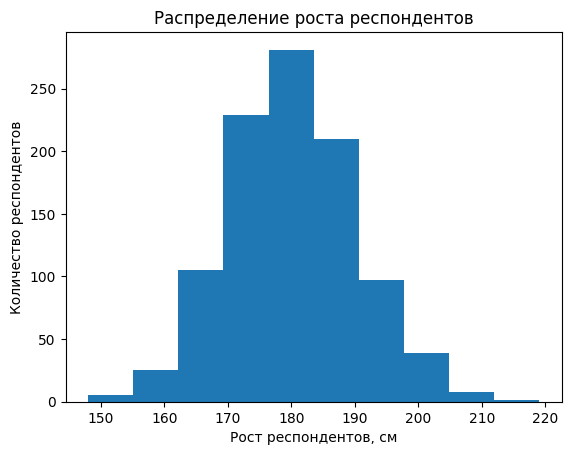

In [ ]:
bins = 10
plt.hist(height, bins);
plt.xlabel('Рост респондентов, см')
plt.ylabel('Количество респондентов')
plt.title('Распределение роста респондентов');

# Доверительный интервал

In [ ]:
height = list(np.round(np.random.normal(180, 10, 1000)))  # генерация случаных высот респондентов

# 90-процентный доверительный интервал
ci = st.norm.interval(confidence=0.9, loc=np.mean(height), scale=st.sem(height))  # confidence interval
# confidence - в скольких процентах случаев интервал должен включать истинное значение среднего всего генерального объема данных
# loc - среднее значение выборки
# scale - стандартная ошибка среднего
ci = np.round(ci, 2)
ci = list(map(float, ci))

In [ ]:
if ci[0] <= float(np.mean(height)) <= ci[1]: print('Интервал включает реальное среднее значение')
else: print('Интервал не включает реальное среднее значение')

Интервал включает реальное среднее значение


# Проверка гипотезы

In [ ]:
# может ли быть средний рост всех мужчин в России равен 182см, учитывая выборку и ее среднее арифметическое

t_statistic, p_value = st.ttest_1samp(height, 182)

# p_valie - вероятность нулевой гипотезы
# нулевая гипотеза - предполагаем, что средний рост мужчин по России действительно составляет 182см
p_value

4.1556012358258656e-05

In [ ]:
# если вероятность нулевой гипотезы меньше 5%, то будем считать ее маловероятной и примем альтернативную гипотезу за верную
# альтернативная гипотеза - средний рост мужчин по России составляет не 182см
if p_value < 0.05:
    print('Скорее всего нулевая гипотеза неверна')
else:
    print('Скорее всего нулевая гипотеза верна')

Скорее всего нулевая гипотеза неверна


# Корелляция двух переменных

In [ ]:
# соберем данные для роста и обхвата шеи
height_women_new = [1.48, 1.49, 1.49, 1.50, 1.51, 1.52, 1.52, 1.53, 1.53, 1.54, 1.55, 1.56, 1.57, 1.57, 1.58, 1.58, 1.59, 1.60, 1.61, 1.62, 1.63, 1.64, 1.65, 1.65, 1.66, 1.67, 1.67, 1.68, 1.68,  1.69, 1.70, 1.70, 1.71, 1.71, 1.71, 1.74, 1.75, 1.76, 1.77, 1.77, 1.78]
neck_women = [29.1, 30.0, 30.1, 30.2, 30.4, 30.6, 30.8, 30.9, 31.0, 30.6, 30.7, 30.9, 31.0, 31.2, 31.3, 32.0, 31.4, 31.9, 32.4, 32.8, 32.8, 33.3, 33.6, 33.0, 33.9, 33.8, 35.0, 34.5, 34.7, 34.6, 34.2, 34.8, 35.5, 36.0, 36.2, 36.3, 36.6, 36.8, 36.8, 37.0, 38.5]

Text(0.5, 1.0, 'Зависимость роста и окружности шеи у женщин в России')

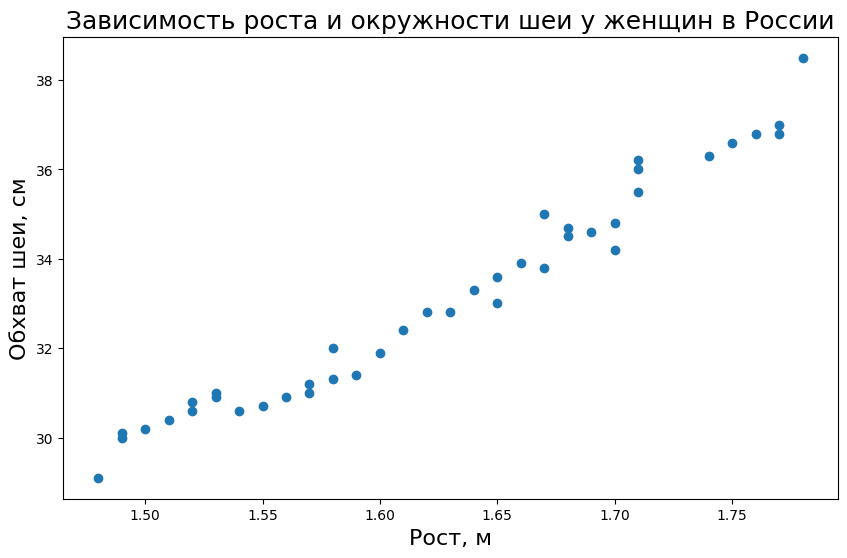

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(height_women_new, neck_women)

plt.xlabel('Рост, м', fontsize = 16)
plt.ylabel('Обхват шеи, см', fontsize = 16)
plt.title('Зависимость роста и окружности шеи у женщин в России', fontsize = 18)

In [ ]:
# корелляция роста женщин и обхвата их шеи
# корелляция - степень зависимости 2 объемов данных. 1 - наибольшая степень (оба набора данных увеличиваюся), -1 - наименьшая степень (оба набора данных уменьшаются)

np.round(st.pearsonr(height_women_new, neck_women)[0], 2)

0.98

Text(0.5, 1.0, 'Зависимость роста и окружности шеи у женщин в России')

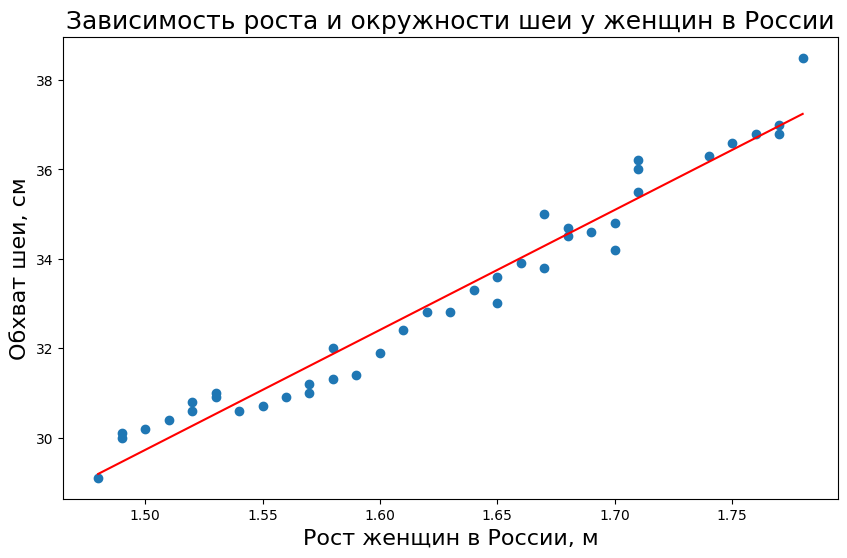

In [ ]:
x = np.array(height_women_new)
y = np.array(neck_women)

plt.figure(figsize=(10, 6))

# нахождение весов y = wx + e
# slope = w
# intercept = e
slope, intercept = np.polyfit(x, y, 1)

plt.scatter(x, y)  # реальная зависимость
plt.plot(x, x*slope+intercept, c='red')  # каждой точке X будет соответствовать прогнозное значение X*slope + intercept

plt.xlabel('Рост женщин в России, м', fontsize = 16)
plt.ylabel('Обхват шеи, см', fontsize = 16)
plt.title('Зависимость роста и окружности шеи у женщин в России', fontsize = 18)

In [ ]:
# предсказание обхвата шеи на основе роста женщины

new_lady = 1.73  # переменная с ростом нового респондента

# подставим это значение в наше уравнение прямой
np.round(26.86 * new_lady - 10.57, 2)

35.9

# Угол между векторами
 $$ \cos(\theta )={\mathbf {b} \cdot \mathbf {c} \over \|\mathbf {b} \|\|\mathbf {c} \|} $$

In [ ]:
# создаем 2 вектора
from tokenize import Decnumber


a = np.array([1.72, 54, 36.2])
b = np.array([1.56, 47, 30.0])

numerator = np.dot(a, b)  # скалярное произведение двух векторов (числитель дроби)

# длина каждого вектора
alen = np.linalg.norm(a)
blen = np.linalg.norm(b)

denuminator = np.multiply(alen, blen)  # произведение длин векторов (знаменатель дроби)

In [ ]:
cos = numerator / denuminator  # косинус угла между векторами
cos

0.9997468709497721

In [ ]:
angle_radians = np.arccos(cos)  # угол между векторами в радианах

angle_degrees = angle_radians * 180/np.pi  # угол между векторами в градусах
angle_degrees

1.2891925481394304